# **1. perkenalan Dataset**

saya mengambil dataset itu dari dicoding yang sudah disediakan bernama beverage sales cuman saya mengubahnya menjadi 20k dikarenakan laptop saya tidak kuat untuk bikin visualisasi data yang jumlahnya sudah masuk jutaan data

# **2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [2]:
data=pd.read_csv("beverage_sales.csv")
data

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,8/23/2023
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,8/23/2023
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,8/23/2023
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,8/23/2023
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,8/23/2023
...,...,...,...,...,...,...,...,...,...,...,...
19995,ORD6700,CUS1254,B2C,Passion Fruit Juice,Juices,3.02,4,0.00,12.08,Bayern,7/24/2022
19996,ORD6701,CUS329,B2C,Moët & Chandon,Alcoholic Beverages,57.11,6,0.00,342.66,Thüringen,2/13/2021
19997,ORD6701,CUS329,B2C,Mountain Dew,Soft Drinks,0.93,3,0.00,2.79,Thüringen,2/13/2021
19998,ORD6702,CUS9021,B2C,Volvic Touch,Water,1.46,4,0.00,5.84,Brandenburg,1/19/2023


# **4. Exploratory Data Analysis (EDA)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       20000 non-null  object 
 1   Customer_ID    20000 non-null  object 
 2   Customer_Type  20000 non-null  object 
 3   Product        20000 non-null  object 
 4   Category       20000 non-null  object 
 5   Unit_Price     20000 non-null  float64
 6   Quantity       20000 non-null  int64  
 7   Discount       20000 non-null  float64
 8   Total_Price    20000 non-null  float64
 9   Region         20000 non-null  object 
 10  Order_Date     20000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.7+ MB


In [4]:
data["Order_Date"]=pd.to_datetime(data["Order_Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       20000 non-null  object        
 1   Customer_ID    20000 non-null  object        
 2   Customer_Type  20000 non-null  object        
 3   Product        20000 non-null  object        
 4   Category       20000 non-null  object        
 5   Unit_Price     20000 non-null  float64       
 6   Quantity       20000 non-null  int64         
 7   Discount       20000 non-null  float64       
 8   Total_Price    20000 non-null  float64       
 9   Region         20000 non-null  object        
 10  Order_Date     20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.7+ MB


In [5]:
print("jumlah duplikasi:",data.duplicated().sum())

jumlah duplikasi: 0


In [6]:
data.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order_ID,20000,6702,ORD6661,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,20000,4928,CUS1614,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,20000,2,B2C,12823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,20000,47,Granini Apple,754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,20000,4,Soft Drinks,5062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit_Price,20000.0,NaN,NaN,NaN,5.759278,0.32,1.07,1.765,3.21,137.36,14.755431
Quantity,20000.0,NaN,NaN,NaN,23.3101,1.0,6.0,11.0,31.0,100.0,27.019251
Discount,20000.0,NaN,NaN,NaN,0.030023,0.0,0.0,0.0,0.05,0.15,0.045046
Total_Price,20000.0,NaN,NaN,NaN,129.260358,0.39,8.54,21.14,69.27,11325.33,498.860934
Region,20000,16,Hamburg,1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


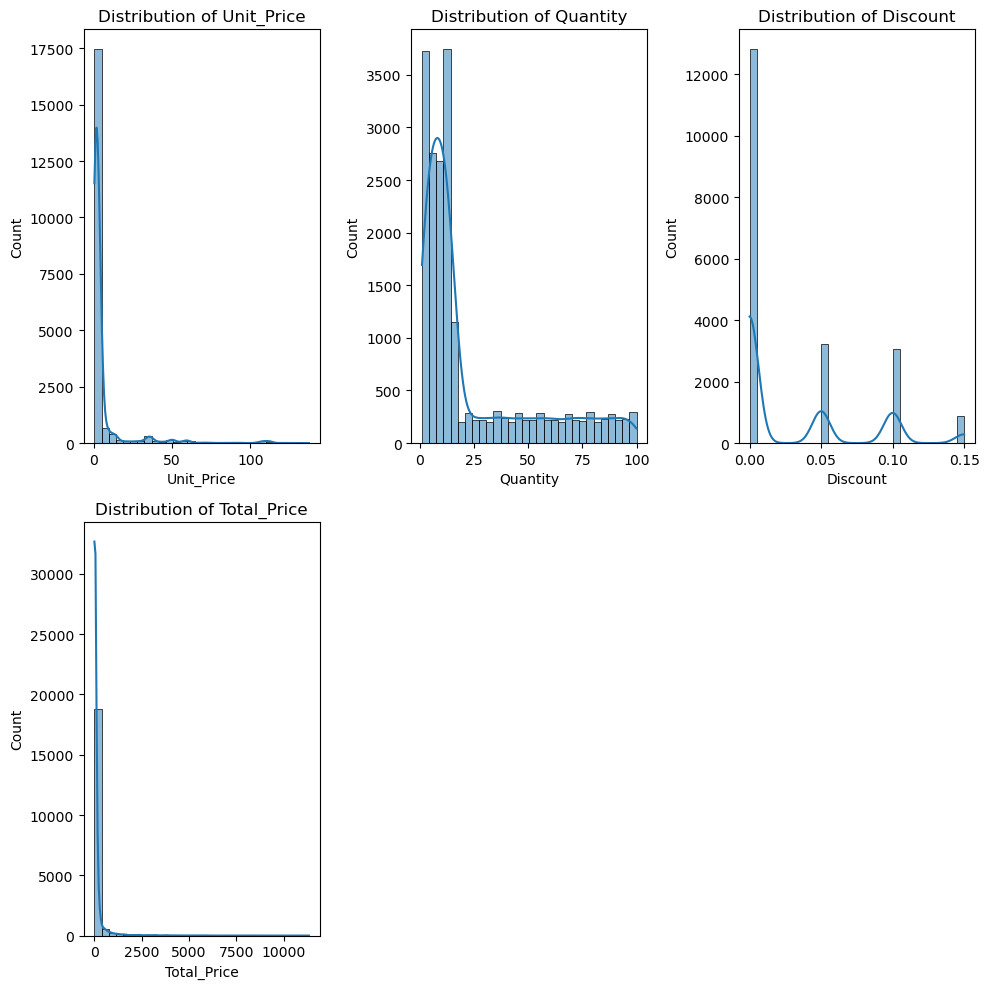

In [8]:
# Visualisasi distribusi data untuk beberapa kolom
fitur_numerik=data.select_dtypes(include=["number"])
 
plt.figure(figsize=(10, 10))
for i, column in enumerate(fitur_numerik, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

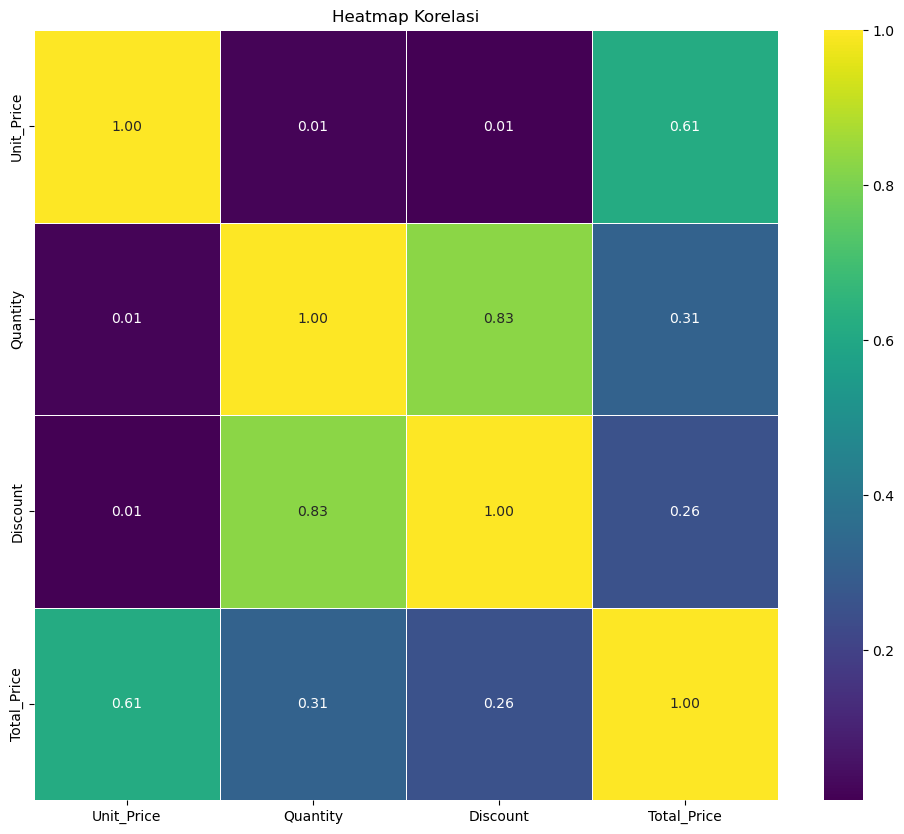

In [9]:
# Heatmap korelasi untuk fitur numerikal
plt.figure(figsize=(12, 10))
correlation_matrix = fitur_numerik.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [10]:
#melihat fitur kategorikal
data.describe(exclude=np.number)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Order_Date
count,20000,20000,20000,20000,20000,20000,20000
unique,6702,4928,2,47,4,16,NaN
top,ORD6661,CUS1614,B2C,Granini Apple,Soft Drinks,Hamburg,NaN
freq,5,19,12823,754,5062,1465,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-09 22:07:36.479999744
min,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-09 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-15 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-30 00:00:00


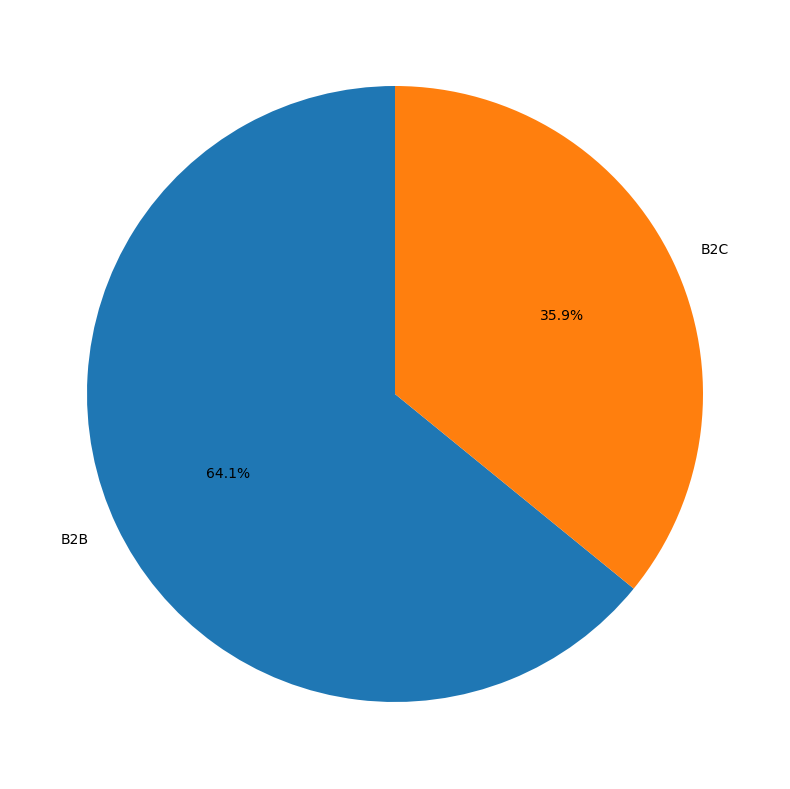

In [11]:
plt.figure( figsize=(8,18))
#menampilkan pie chart customer_type yang paling banyak 
plt.pie(data['Customer_Type'].value_counts(), labels=['B2B', 'B2C'], autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

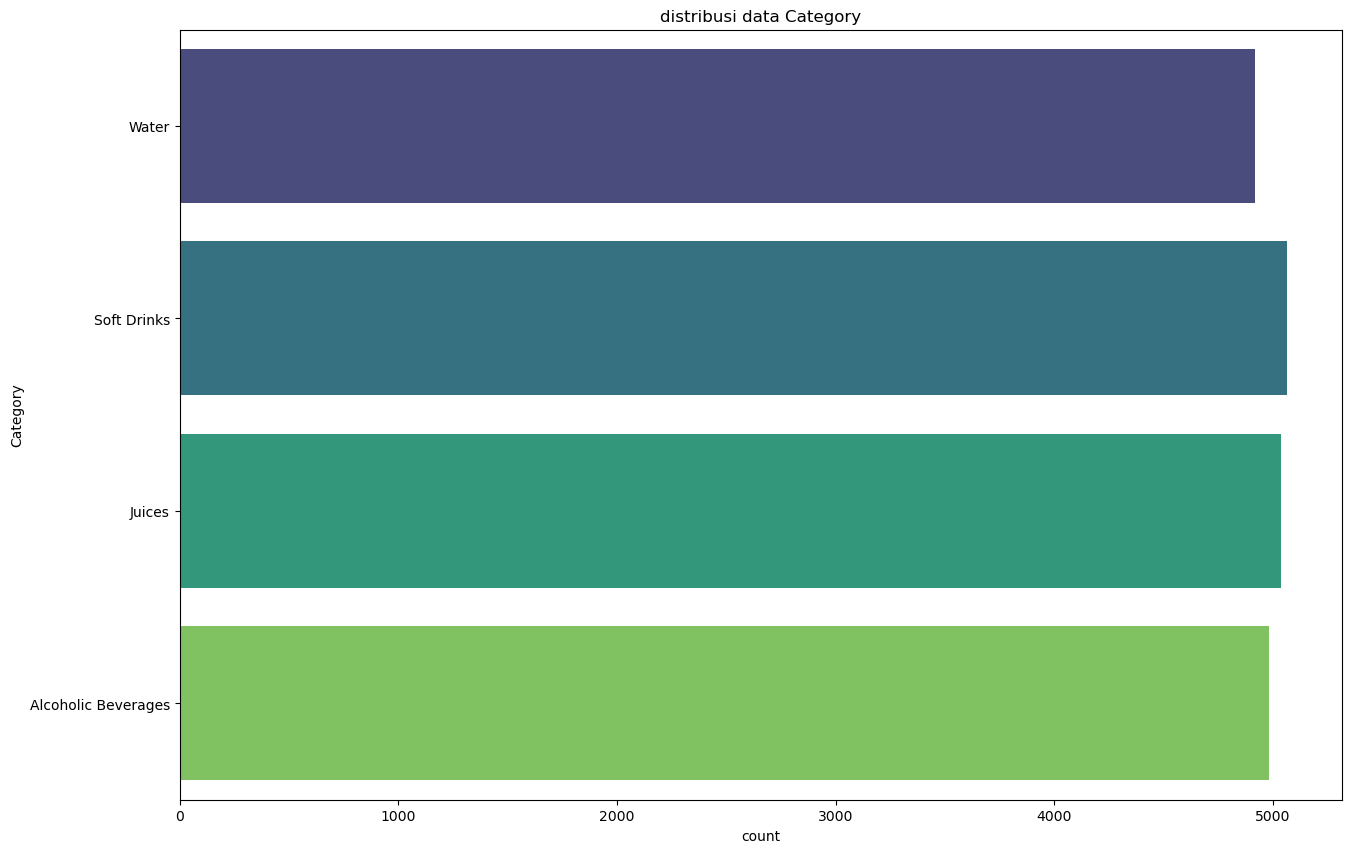

In [12]:
#melihat distirbusi data pada Category
plt.figure(figsize=(15,10))
sns.countplot(y=data["Category"],hue=data["Category"],palette="viridis")
plt.title("distribusi data Category")
plt.show()

# **5. Data Preprocessing**

In [13]:
data=data.drop(["Order_ID","Customer_ID","Product","Category","Region","Order_Date"],axis=1,errors='ignore')
data

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
0,B2B,1.66,53,0.10,79.18
1,B2B,1.56,90,0.10,126.36
2,B2B,1.17,73,0.05,81.14
3,B2B,3.22,59,0.10,170.98
4,B2B,0.87,35,0.10,27.40
...,...,...,...,...,...
19995,B2C,3.02,4,0.00,12.08
19996,B2C,57.11,6,0.00,342.66
19997,B2C,0.93,3,0.00,2.79
19998,B2C,1.46,4,0.00,5.84


In [14]:
data.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.759278,23.310100,0.030023,129.260358
std,14.755431,27.019251,0.045046,498.860934
min,0.320000,1.000000,0.000000,0.390000
25%,1.070000,6.000000,0.000000,8.540000
50%,1.765000,11.000000,0.000000,21.140000
75%,3.210000,31.000000,0.050000,69.270000
max,137.360000,100.000000,0.150000,11325.330000


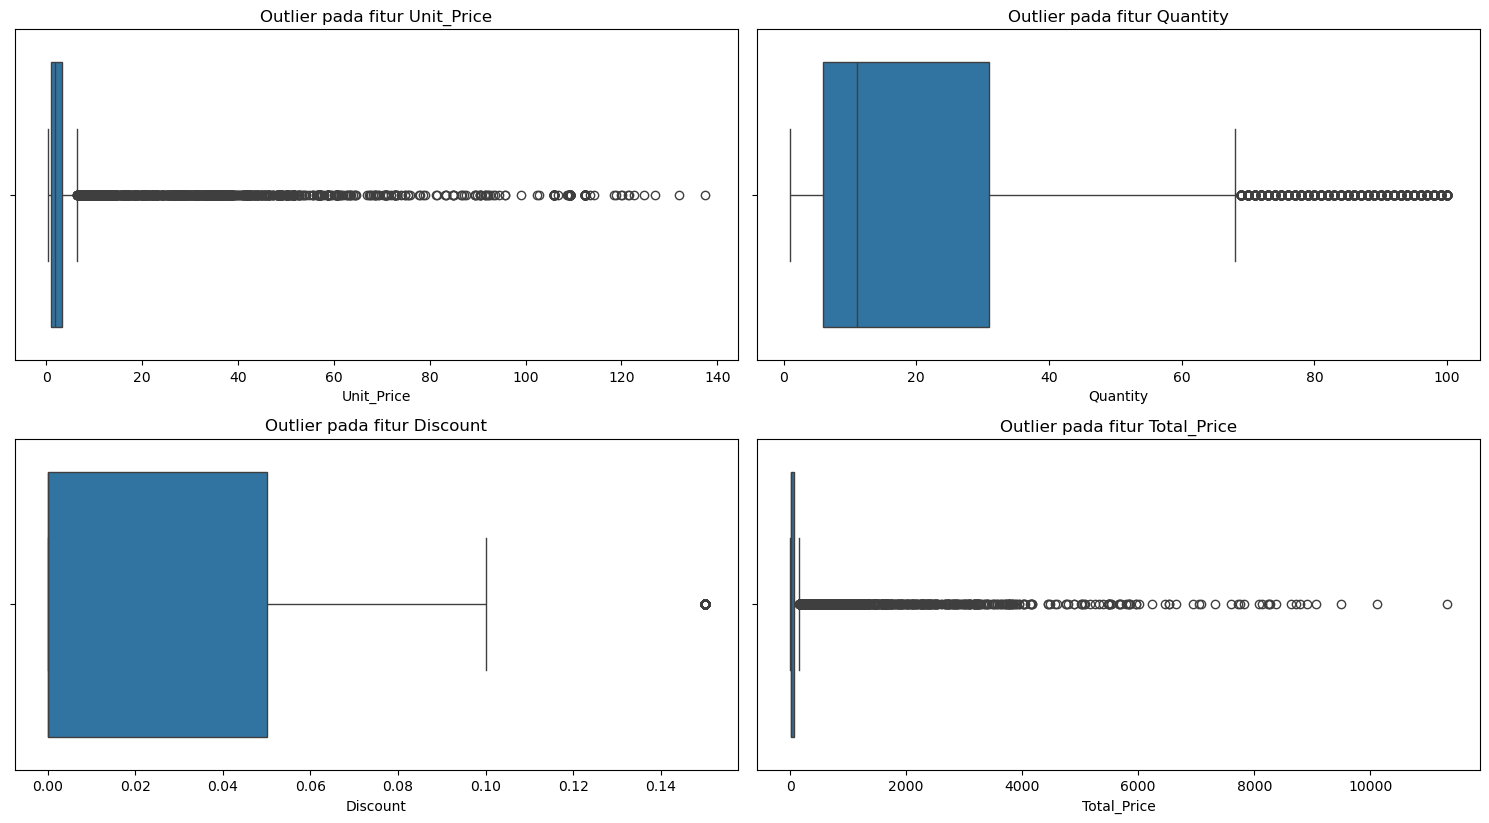

In [15]:
fitur_numerik=data.select_dtypes(include=["number"])
plt.figure(figsize=(15,12))
for i,feature in enumerate(fitur_numerik,1):
    plt.subplot(3,2,i)
    sns.boxplot(x=fitur_numerik[feature])
    plt.title(f'Outlier pada fitur {feature}')

plt.tight_layout()
plt.show()

In [16]:
# Memilih fitur numerik
fitur_numerik = data[["Unit_Price", "Quantity", "Discount", "Total_Price"]]

# Menghitung Q1, Q3, dan IQR
Q1 = fitur_numerik.quantile(0.25)
Q3 = fitur_numerik.quantile(0.75)
IQR = Q3 - Q1

# Filter untuk menghapus outlier
condition = ~((fitur_numerik < (Q1 - 1.5 * IQR)) | (fitur_numerik > (Q3 + 1.5 * IQR))).any(axis=1)
df_numerik_filter = fitur_numerik[condition] 

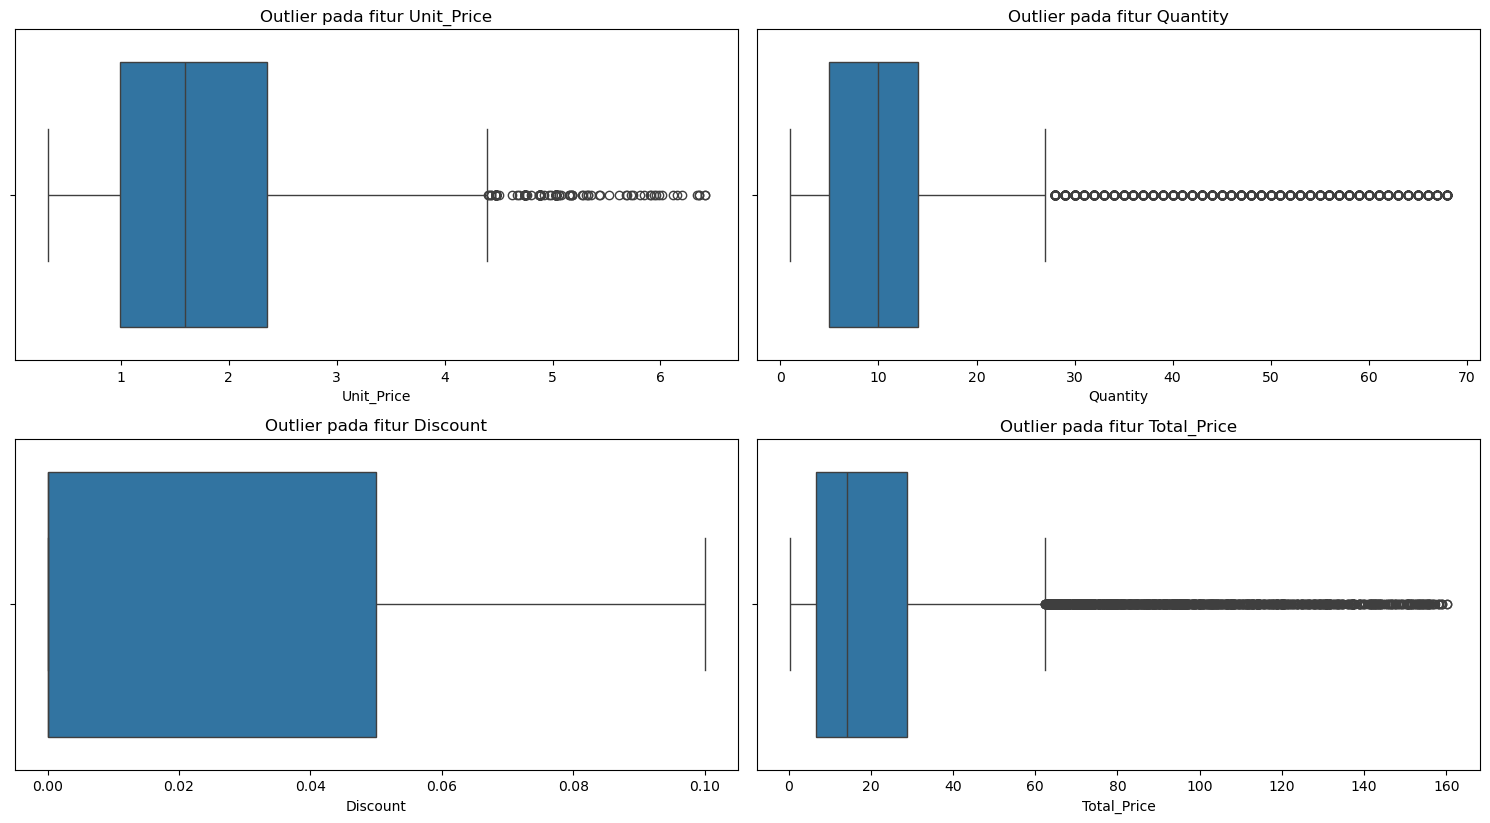

In [17]:
plt.figure(figsize=(15,12))
for i,feature in enumerate(df_numerik_filter,1):
    plt.subplot(3,2,i)
    sns.boxplot(x=df_numerik_filter[feature])
    plt.title(f'Outlier pada fitur {feature}')

plt.tight_layout()
plt.show()

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('categorical', OneHotEncoder(), make_column_selector(dtype_exclude=np.number))
])

# Pipeline dengan preprocessing
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])
# Terapkan preprocessing
data_final = pipeline.fit_transform(data)


# **6. Pembangunan Model Clustering**

## **a. pembangunan Model Clustering**

In [19]:
kmean=KMeans(n_clusters=7,random_state=42)
cluster=kmean.fit_predict(data_final)

cluter = 2, jumlah silhouette scorenya adalah : 0.627058139203098
cluter = 3, jumlah silhouette scorenya adalah : 0.6624678541774227
cluter = 4, jumlah silhouette scorenya adalah : 0.684786839724672
cluter = 5, jumlah silhouette scorenya adalah : 0.6883374574516427
cluter = 6, jumlah silhouette scorenya adalah : 0.6980780810003611
cluter = 7, jumlah silhouette scorenya adalah : 0.708327619416295
cluter = 8, jumlah silhouette scorenya adalah : 0.6822548763115642
cluter = 9, jumlah silhouette scorenya adalah : 0.6852888106895764
cluter = 10, jumlah silhouette scorenya adalah : 0.4278857453144232


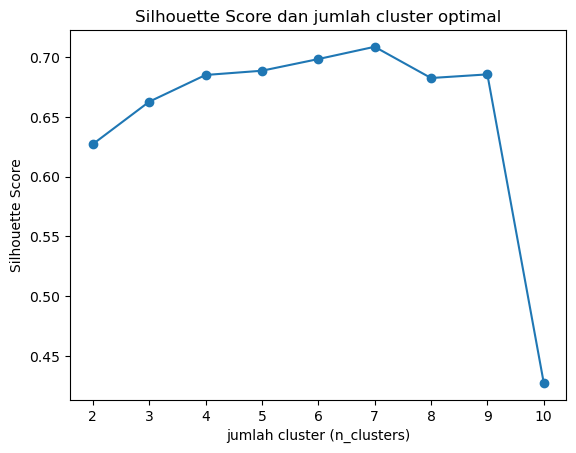

In [20]:
range_n_cluster=range(2,11)
silhouette_scores = []
for n_clusters in range_n_cluster:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(data_final)
  silhouette_avg = silhouette_score(data_final, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"cluter = {n_clusters}, jumlah silhouette scorenya adalah : {silhouette_avg}")

# Plot Silhouette Score vs n_clusters
plt.plot(range_n_cluster, silhouette_scores, marker='o')
plt.xlabel('jumlah cluster (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score dan jumlah cluster optimal')
plt.show()

## **b. Evaluasi Model Clustering**

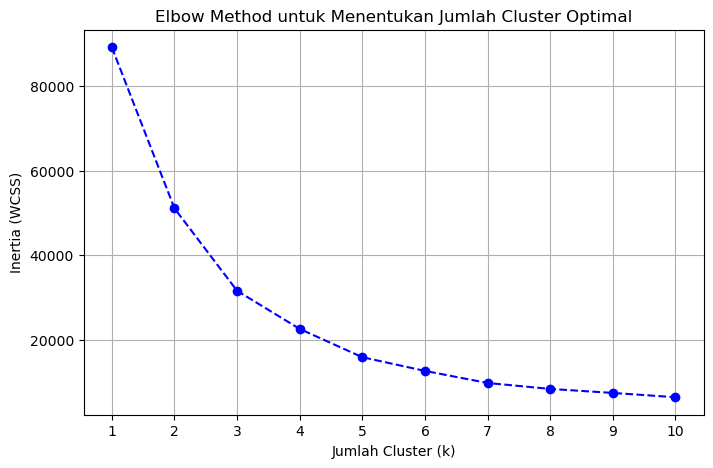

In [21]:
cluster_range = range(1, 11)
inertia = []

# Melakukan KMeans untuk setiap jumlah cluster
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_final)
    inertia.append(kmeans.inertia_)  # Menyimpan nilai inertia

# Membuat plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [22]:
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(data_final)
silhouette_score=silhouette_score(data_final, cluster)
print(f"The average silhoutte score:{silhouette_score}")

The average silhoutte score:0.708327619416295


## **c. Feature Selection(Opsional)**

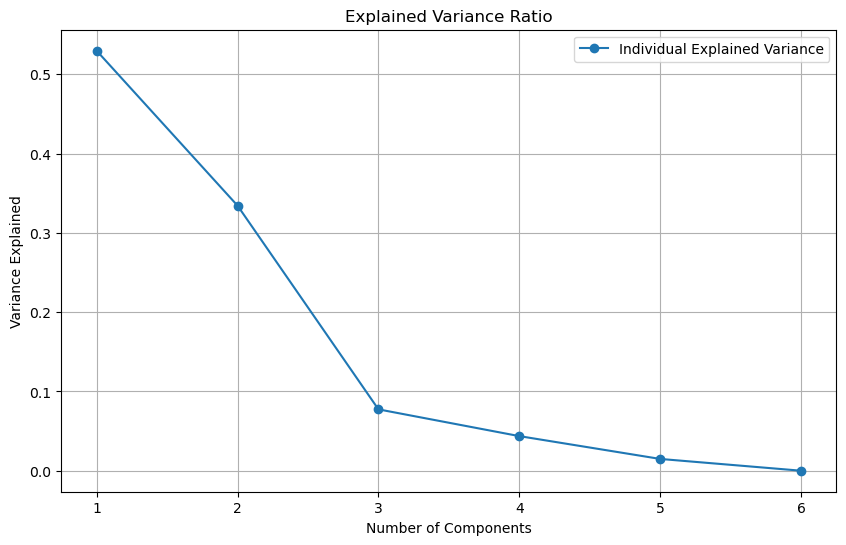

In [23]:
# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=6) #mengurangi dimensi menjadi beberapa komponen

# Fit dan transform data yang telah di-preprocess
pca_result = pca.fit_transform(data_final)

# Visualisasi Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')


plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance Ratio')
plt.legend(['Individual Explained Variance'])
plt.grid(True)
plt.show()

## **d. Visualisasi Hasil Clustering**

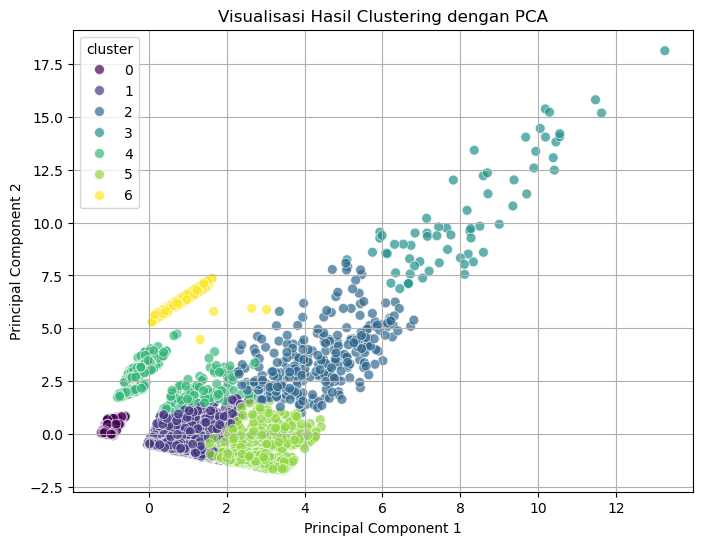

In [24]:
# Menggunakan PCA untuk mereduksi dimensi ke 2D agar dapat divisualisasikan
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_final)

# Membuat scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster, palette='viridis', s=50, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.legend(title="cluster")
plt.grid()
plt.show()

In [25]:
# Analisis numerik per kluster
data['cluster']=cluster
cluster_stats = data.groupby('cluster').agg({
    'Unit_Price': ['mean', 'median', 'min', 'max', 'std', 'count'],
    'Quantity': ['mean', 'median', 'min', 'max', 'std', 'sum'],
    'Discount': ['mean', 'median', 'min', 'max', 'std'],
    'Total_Price': ['mean', 'median', 'min', 'max', 'std', 'sum']
})

print("Statistik per Kluster:")
display(cluster_stats.T)

Statistik per Kluster:


cluster                         0              1              2  \
Unit_Price  mean         2.324813       2.717734      40.950037   
            median       1.660000       1.510000      38.470000   
            min          0.460000       0.320000      17.030000   
            max         14.260000      35.420000     106.710000   
            std          2.310921       4.224159      14.233008   
            count    12040.000000    3570.000000     270.000000   
Quantity    mean         8.021179      27.343417      69.092593   
            median       8.000000      27.000000      69.500000   
            min          1.000000       1.000000      26.000000   
            max         15.000000      62.000000     100.000000   
            std          4.352841      16.058444      19.078266   
            sum      96575.000000   97616.000000   18655.000000   
Discount    mean         0.000000       0.063950       0.097778   
            median       0.000000       0.050000       0.100000   
            min          0.000000       0.050000       0.050000   
            max          0.000000       0.150000       0.150000   
            std          0.000000       0.024998       0.032186   
Total_Price mean        18.579286      67.374768    2447.534667   
            median      12.250000      33.800000    2347.170000   
            min          0.460000       0.390000    1215.650000   
            max        213.900000    1215.950000    4167.610000   
            std         23.210273     115.502587     802.383109   
            sum     223694.600000  240527.920000  660834.360000   

cluster                         3              4              5              6  
Unit_Price  mean        89.218939      44.478554       2.743898     109.428297  
            median      89.430000      38.550000       1.890000     109.190000  
            min         60.580000      27.150000       0.340000      84.840000  
            max        137.360000      72.700000      35.490000     121.280000  
            std         20.182469      10.620977       3.101490       3.533742  
            count       66.000000     719.000000    3153.000000     182.000000  
Quantity    mean        80.969697       9.888734      75.949889       7.868132  
            median      81.000000       9.000000      77.000000       8.000000  
            min         50.000000       1.000000      29.000000       1.000000  
            max        100.000000      45.000000     100.000000      26.000000  
            std         13.503241       7.267194      15.244705       4.639987  
            sum       5344.000000    7110.000000  239470.000000    1432.000000  
Discount    mean         0.105303       0.009110       0.105312       0.001099  
            median       0.100000       0.000000       0.100000       0.000000  
            min          0.050000       0.000000       0.050000       0.000000  
            max          0.150000       0.150000       0.150000       0.050000  
            std          0.032967       0.022480       0.029341       0.007351  
Total_Price mean      6387.500909     417.988470     184.622680     856.737363  
            median    5828.005000     390.720000     127.460000     873.520000  
            min       4159.580000      27.530000      14.280000     106.010000  
            max      11325.330000    1336.540000    1390.660000    2095.550000  
            std       1597.642468     275.192902     197.081253     492.460341  
            sum     421575.060000  300533.710000  582115.310000  155926.200000

## **e. Analisis dan Interpretasi Hasil Clustering**

# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster berdasarkan jenis pelanggan,harga unit,jumlah,diskon,Total belanja

## **Cluster 0**:
- **Rata-rata Unit Price:** 2.32  
- **Rata-rata Quantity:** 8.02 unit
- **Rata-rata Discount:** 0%
- **Rata-rata Total Price:** $18.58
- **Analisis:** Cluster ini terdiri dari pelanggan dengan harga produk rendah dan jumlah pembelian yang kecil. Mereka mungkin adalah pelanggan yang melakukan pembelian eceran atau hanya mencoba produk dalam jumlah kecil.

## **Cluster 1**:
- **Rata-rata Unit Price:** 2.71  
- **Rata-rata Quantity:** 27.34 unit
- **Rata-rata Discount:** 0.0639%
- **Rata-rata Total Price:** $67.37
- **Analisis:** Pelanggan dalam cluster ini membeli dalam jumlah lebih besar dibandingkan Cluster 0, namun masih dengan harga produk yang terjangkau. Mereka mungkin adalah pelanggan bisnis skala kecil yang membeli dalam jumlah sedang.


## **Cluster 2**:
- **Rata-rata Unit Price:** 40.95  
- **Rata-rata Quantity:** 69.09 unit
- **Rata-rata Discount:** 0.0977%
- **Rata-rata Total Price:** $2447.53
- **Analisis:** Cluster ini mencakup pelanggan yang membeli produk dengan harga lebih mahal dan dalam jumlah besar. Mereka kemungkinan besar merupakan pembeli korporat atau distributor yang membeli untuk dijual kembali.


## **Cluster 3**:
- **Rata-rata Unit Price:** 89.21  
- **Rata-rata Quantity:** 80.96 unit
- **Rata-rata Discount:** 0.1053%
- **Rata-rata Total Price:** $ 6387.50
- **Analisis:**  Ini adalah cluster pelanggan dengan daya beli tinggi yang membeli produk premium dalam jumlah besar. Mereka bisa jadi pelanggan bisnis besar atau pelanggan loyal yang memiliki kebutuhan besar untuk produk tertentu.


## **Cluster 4**:
- **Rata-rata Unit Price:**  44.47 
- **Rata-rata Quantity:** 9.88 unit
- **Rata-rata Discount:** 0.0091%
- **Rata-rata Total Price:** $ 417.98
- **Analisis:** Pelanggan dalam cluster ini membeli produk dengan harga tinggi tetapi dalam jumlah kecil. Mereka mungkin adalah pelanggan ritel yang mencari produk premium dalam jumlah terbatas.


## **Cluster 5**:
- **Rata-rata Unit Price:** 2.74  
- **Rata-rata Quantity:** 75.95 unit
- **Rata-rata Discount:** 0.1053%
- **Rata-rata Total Price:** $ 184.62
- **Analisis:** Cluster ini mencerminkan pelanggan yang membeli produk murah dalam jumlah besar. Ini bisa jadi pelanggan bisnis yang ingin mendapatkan keuntungan dari diskon volume atau toko yang mengisi ulang stok

## **Cluster 6**:
- **Rata-rata Unit Price:** 109.42
- **Rata-rata Quantity:** 7.86 unit
- **Rata-rata Discount:** 0.0010%
- **Rata-rata Total Price:** $ 856.73
- **Analisis:** Pelanggan ini membeli produk dengan harga sangat tinggi tetapi dalam jumlah kecil. Mereka bisa jadi pelanggan eksklusif atau niche market yang hanya tertarik pada produk tertentu.


# **Kesimpulan**
- Pelanggan terbagi dalam beberapa segmen berdasarkan daya beli dan jumlah pembelian.
- Cluster 3 dan 2 adalah pelanggan dengan total pembelian tertinggi, kemungkinan besar distributor atau pelanggan korporat.
- Cluster 5 dan 1 membeli dalam jumlah besar tetapi dengan harga produk rendah, menunjukkan potensi sebagai pelanggan grosir.
- Cluster 6 dan 4 adalah pelanggan premium yang membeli produk mahal dalam jumlah kecil, mungkin segmen eksklusif.
- Cluster 0 adalah pelanggan ritel biasa dengan daya beli rendah.

# **Strategi Bisnis**
### **1. Loyalty Program untuk Cluster 3 & 2**
- Berikan insentif seperti diskon khusus atau program membership untuk mempertahankan pelanggan bernilai tinggi.

### **2. Paket Grosir untuk Cluster 5 & 1**
- Tawarkan paket hemat atau harga spesial untuk pembelian dalam jumlah besar agar mereka semakin loyal.

### **3. Eksklusivitas untuk Cluster 6 & 4**
- Berikan layanan premium, produk eksklusif, atau pengalaman belanja VIP untuk menarik pelanggan kelas atas.

### **4. Promosi untuk Cluster 0**
- Berikan promo diskon atau bundling produk agar mereka lebih sering berbelanja dan meningkatkan daya beli.

# **7. Mengeksport Data**

In [26]:

data.to_csv('beverage_cluster.csv',index=False)